In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pwd

'/Users/macbook/Desktop/timeseries'

In [9]:
df=pd.read_csv('arima/Temp_Data.csv',index_col='DATE',parse_dates=True)

In [10]:
df

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [12]:
df.index.freq='D'
df.dropna(inplace=True)

In [15]:
df =pd.DataFrame(df['Temp'])

In [16]:
df

,Temp
DATE,
2020-01-01,-0.44
2020-01-02,-0.09
2020-01-03,2.95
2020-01-04,-0.80
2020-01-05,-7.95
...,...
2021-06-03,18.55
2021-06-04,20.80
2021-06-05,22.75


<Axes: xlabel='DATE'>

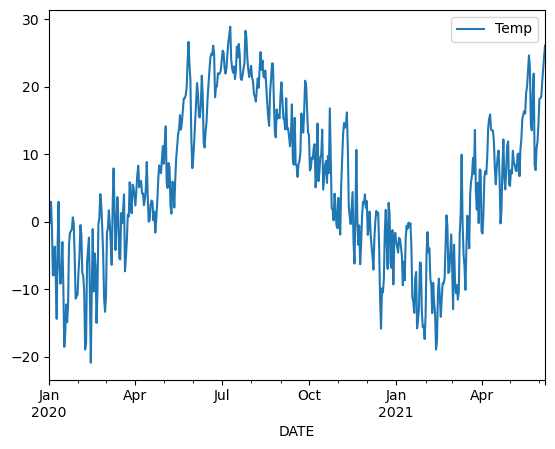

In [18]:
df.plot()

In [19]:
train = df.iloc[:510,0]
test=df.iloc[510:,0]

In [20]:
train

DATE
2020-01-01    -0.44
2020-01-02    -0.09
2020-01-03     2.95
2020-01-04    -0.80
2020-01-05    -7.95
              ...  
2021-05-20    22.45
2021-05-21    24.65
2021-05-22    22.80
2021-05-23    14.35
2021-05-24    13.55
Freq: D, Name: Temp, Length: 510, dtype: float64

In [21]:
test

DATE
2021-05-25    19.14
2021-05-26    21.95
2021-05-27     8.44
2021-05-28     7.65
2021-05-29    10.90
2021-05-30    11.85
2021-05-31    14.45
2021-06-01    18.20
2021-06-02    18.30
2021-06-03    18.55
2021-06-04    20.80
2021-06-05    22.75
2021-06-06    24.60
2021-06-07    26.10
Freq: D, Name: Temp, dtype: float64

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
Decomp_results = seasonal_decompose(df)

<Axes: xlabel='DATE', ylabel='Resid'>

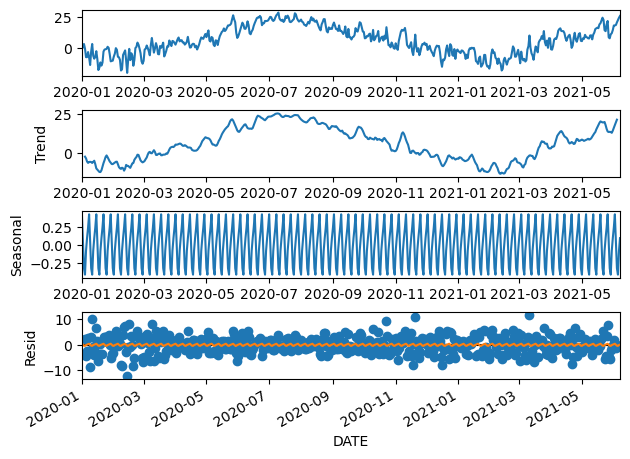

In [32]:
Decomp_results.plot()
Decomp_results.seasonal.plot()

In [33]:
#finding p,d and q

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

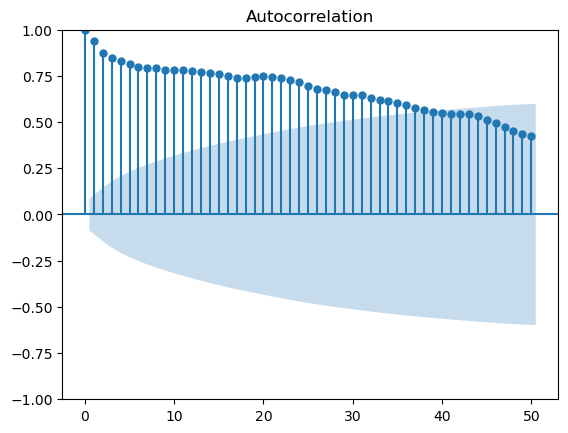

In [42]:
plot_acf(train,lags=50);

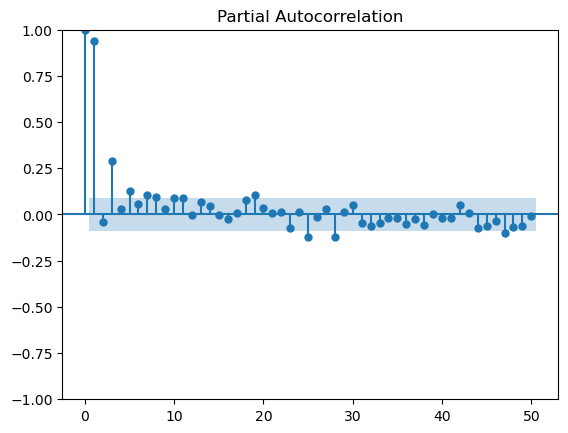

In [43]:
plot_pacf(train,lags=50);

In [46]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.3/607.3 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.2 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [47]:
from pmdarima import auto_arima

In [48]:
auto_arima(df,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2846.718, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2929.050, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.026, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2930.983, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2927.135, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2845.685, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2856.303, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2882.045, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2846.604, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2848.805, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2858.051, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2848.587, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2844.520, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2854.723, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
#ARIMA MODEL

In [55]:
from statsmodels.tsa.arima.model import ARIMA


In [58]:
A_model=ARIMA(train, order=(1,1,2))

In [60]:
predictor =A_model.fit()
predictor.summarymmary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  510
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1378.671
Date:                Mon, 16 Oct 2023   AIC                           2765.341
Time:                        15:01:45   BIC                           2782.271
Sample:                    01-01-2020   HQIC                          2771.979
                         - 05-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.077      4.216      0.000       0.173       0.474
ma.L1         -0.3850      0.074     -5.223      0.000      -0.529      -0.240
ma.L2         -0.4007      0.046     -8.772      0.000      -0.490      -0.311
sigma2        13.1715      0.809     16.284      0.000      11.586      14.757
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
predicted_results=predictor.predict(start=len(train),end=len(train)+len(test)-1,
                                   typ='levels')

In [65]:
predicted_results

2021-05-25    15.552138
2021-05-26    16.149253
2021-05-27    16.342371
2021-05-28    16.404829
2021-05-29    16.425028
2021-05-30    16.431561
2021-05-31    16.433674
2021-06-01    16.434358
2021-06-02    16.434579
2021-06-03    16.434650
2021-06-04    16.434673
2021-06-05    16.434681
2021-06-06    16.434683
2021-06-07    16.434684
Freq: D, Name: predicted_mean, dtype: float64

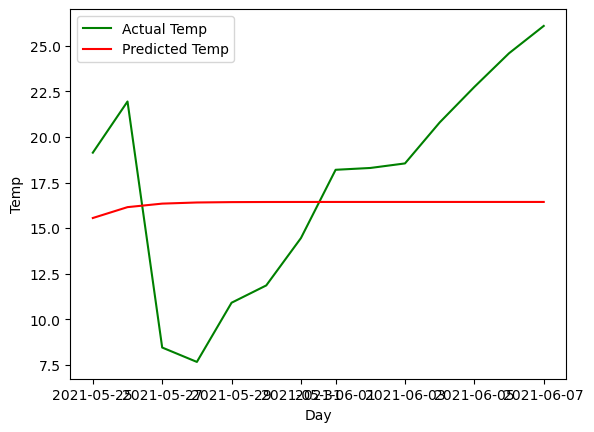

In [67]:
plt.plot(test,color='green',label='Actual Temp')
plt.plot(predicted_results,color='red',label='Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()

In [70]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test,predicted_results))

In [71]:
rmse

5.801290354936496